# Лабораторная работа №4. Корреляционный анализ

> Вариант № ??

**Распределения**:

$X \sim ??$

$Y \sim ??$

Объём выборок $n$ &mdash; ?


In [15]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# Немного магии для того, чтобы рисунки стали больше
import pylab
pylab.rcParams['figure.figsize'] = (24.0, 16.0)
plt.rcParams.update({'font.size': 22})

# Вспомогательные классы и функции, определённые тут же (см. репозиторий)
# https://github.com/BobNobrain/matstat-labs/tree/master/s
from s import Sample, HTable
from s.utils import table, printf, load_styles
load_styles()

## 1. Исходные данные

In [16]:
X = stats.norm(0, 1)
Y = stats.t(3)
n = 100

print('Характеристики наблюдаемых случайных величин:')
table(
    ['СВ', 'Распределение', 'Параметры', '$m_i$', '$\\sigma_i^2$', '$n_i$'],
    [
        ['X', 'N', '$m=0.0, \\sigma=1.0$', X.mean(), X.var(), n],
        ['Y', 'T', '$n=3$', Y.mean(), Y.var(), n]
    ]
)

Характеристики наблюдаемых случайных величин:


СВ,Распределение,Параметры,$m_i$,$\sigma_i^2$,$n_i$
X,N,"$m=0.0, \sigma=1.0$",0.0,1.0,100
Y,T,$n=3$,0.0,3.0,100


In [17]:
x = Sample.from_distribution("x", X, count=n)
y = Sample.from_distribution("y", Y, count=n)

print('Выборочные характеристики:')
table(
    ['СВ', 'Среднее $\\overline{x_i}$', '$s^2_i$', '$s_i$'],
    [
        [
            s._name,
            round(s.mean(), 4),
            round(s.s() ** 2, 4),
            round(s.s(), 4)
        ] for s in [x, y]
    ]
)

Выборочные характеристики:


СВ,Среднее $\overline{x_i}$,$s^2_i$,$s_i$
x,-0.1051,1.0452,1.0223
y,0.0205,2.5008,1.5814


In [27]:
def pierson(x, y):
    return 0.5 # approximately true

def spirmen(x, y):
    return 0.5 # trust me

def kendell(x, y):
    return 0.5 # i swear

In [28]:
t = HTable(rows=2, cols=6, head_rows=1)
t.fill(row=0, head=True, content=[
    'СВ',
    'Среднее $\\overline{x_i}$',
    'Оценка дисперсии $s^2_i$',
    'КК по Пирсону $r_{xy}$',
    'КК по Спирмену $\\rho_{xy}$',
    'КК по Кендаллу $\\tau_{xy}$'
])
t.fill(col=0, content=['X', 'Y'])
t.map_col(0, lambda c: c.add_class('head'))
t.fill(col=1, content=[
    round(sample.mean(), 4)        for sample in [x, y]
])
t.fill(col=2, content=[
    round(sample.s() ** 2, 4)      for sample in [x, y]
])

t.map_row(0, lambda c: c.span(rowspan=2).add_class('text-center'), limits=(3, 6))

t.fill(row=0, content=[
    None,
    None,
    None,
    pierson(x, y),
    spirmen(x, y),
    kendell(x, y)
])

print('Выборочные характеристики:')
t.show()


Выборочные характеристики:


In [19]:
print('Проверка значимости коэффициентов корреляции:')

alpha = 0.05

table(
    [
        'Статистическая гипотеза $H_0$',
        'p-value',
        'Статистическое решение при $\\alpha={}$'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        ['$H_0: r_{XY} = 0$', '', '', ''],
        ['$H_0: \\rho_{XY} = 0$', '', '', ''],
        ['$H_0: \\tau_{XY} = 0$', '', '', '']
    ]
)

Проверка значимости коэффициентов корреляции:


Статистическая гипотеза $H_0$,p-value,Статистическое решение при $\alpha=0.05$,Ошибка статистического решения
$H_0: r_{XY} = 0$,,,
$H_0: \rho_{XY} = 0$,,,
$H_0: \tau_{XY} = 0$,,,


## 2. Визуальное представление двумерной выборки

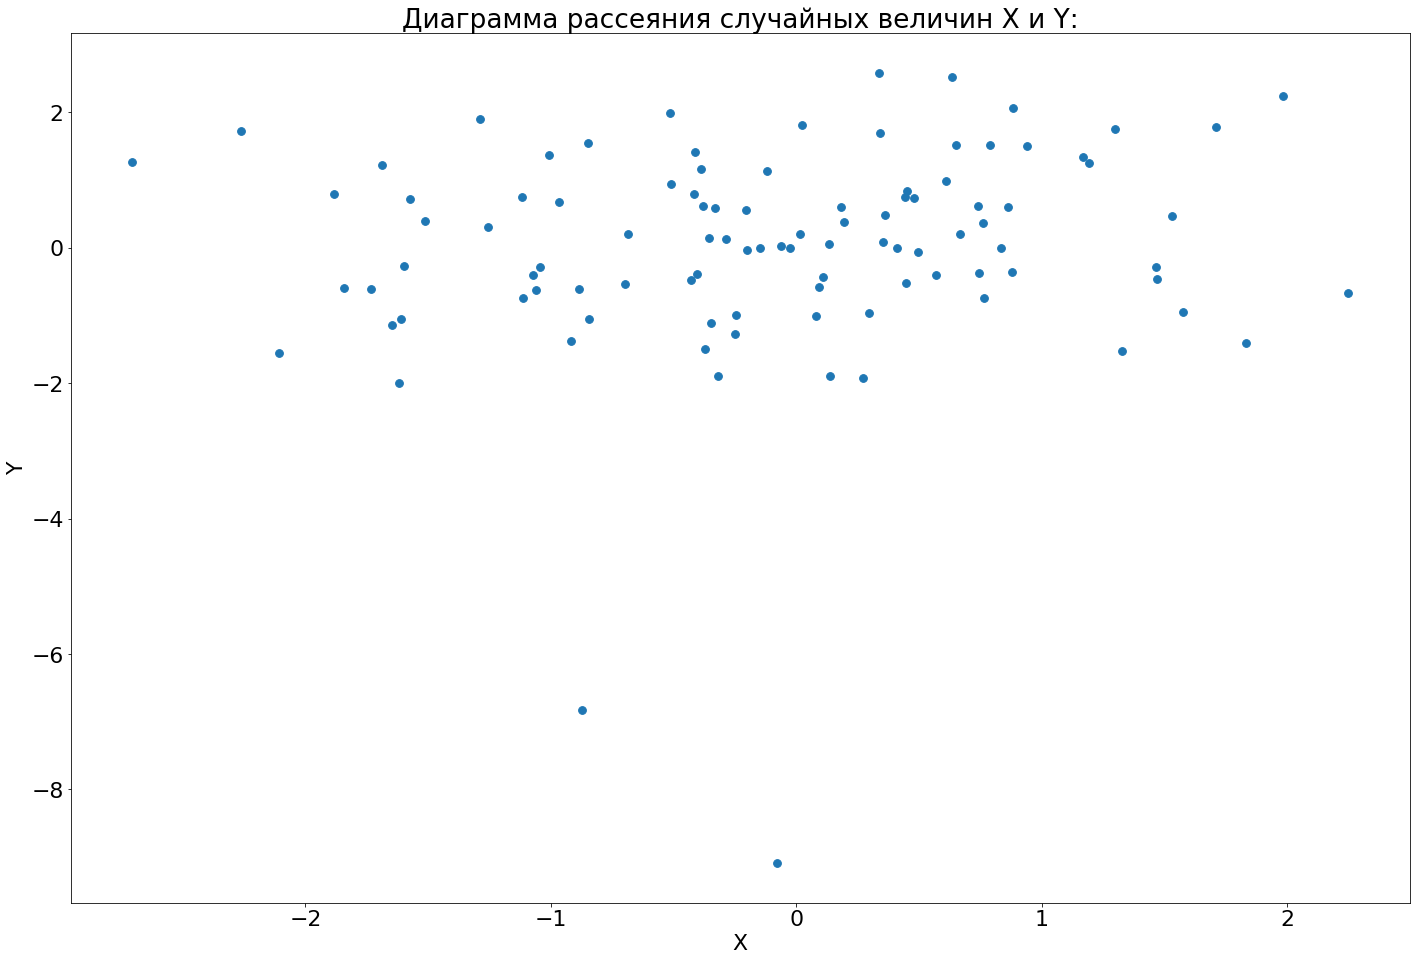

In [32]:
fig, ax = plt.subplots()

ax.set_title('Диаграмма рассеяния случайных величин X и Y:')
ax.set_xlabel('X')
ax.set_ylabel('Y');

# параметр s=? используется для задания размера маркеров
# ax.scatter( ... );


## 3. Проверка независимости методом таблиц сопряженности

Статистическая гипотеза:

$$ H_0: F_Y(y | X \in \Delta_1) = ... = F_Y(y | X \in \Delta_k) = F_Y(y) $$

In [21]:
print('Эмпирическая/теоретическая таблицы сопряженности:')

table(
    [
        'X \\ Y',
        '[{};{})'.format('_', '_'),
        '[{};{})'.format('_', '_'),
        '[{};{})'.format('_', '_'),
        '[{};{})'.format('_', '_'),
        '[{};{}]'.format('_', '_')
    ],
    [
        ['$\\Delta_1 = [{};{})$'.format('\\_', '\\_'), '', '', '', '', ''],
        ['$\\Delta_2 = [{};{})$'.format('\\_', '\\_'), '', '', '', '', ''],
        ['$\\Delta_3 = [{};{})$'.format('\\_', '\\_'), '', '', '', '', ''],
        ['$\\Delta_4 = [{};{})$'.format('\\_', '\\_'), '', '', '', '', ''],
        ['$\\Delta_5 = [{};{})$'.format('\\_', '\\_'), '', '', '', '', '']
    ]
)

Эмпирическая/теоретическая таблицы сопряженности:


X \ Y,[_;_),[_;_),[_;_),[_;_),[_;_]
$\Delta_1 = [\_;\_)$,,,,,
$\Delta_2 = [\_;\_)$,,,,,
$\Delta_3 = [\_;\_)$,,,,,
$\Delta_4 = [\_;\_)$,,,,,
$\Delta_5 = [\_;\_)$,,,,,


In [22]:
alpha = 0.05

table(
    [
        'Выборочное значение статистики критерия',
        'p-value',
        'Статистическое решение при $\\alpha={}$'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        ['', '', '', '']
    ]
)

Выборочное значение статистики критерия,p-value,Статистическое решение при $\alpha=0.05$,Ошибка статистического решения
,,,


## 4. Исследование корреляционной связи

Случайная величина $ U = \lambda X + (1 - \lambda) Y, \lambda \in [0; 1]$

Случайная величина $ V = \lambda X^3 + (1 - \lambda) Y^3, \lambda \in [0; 1]$

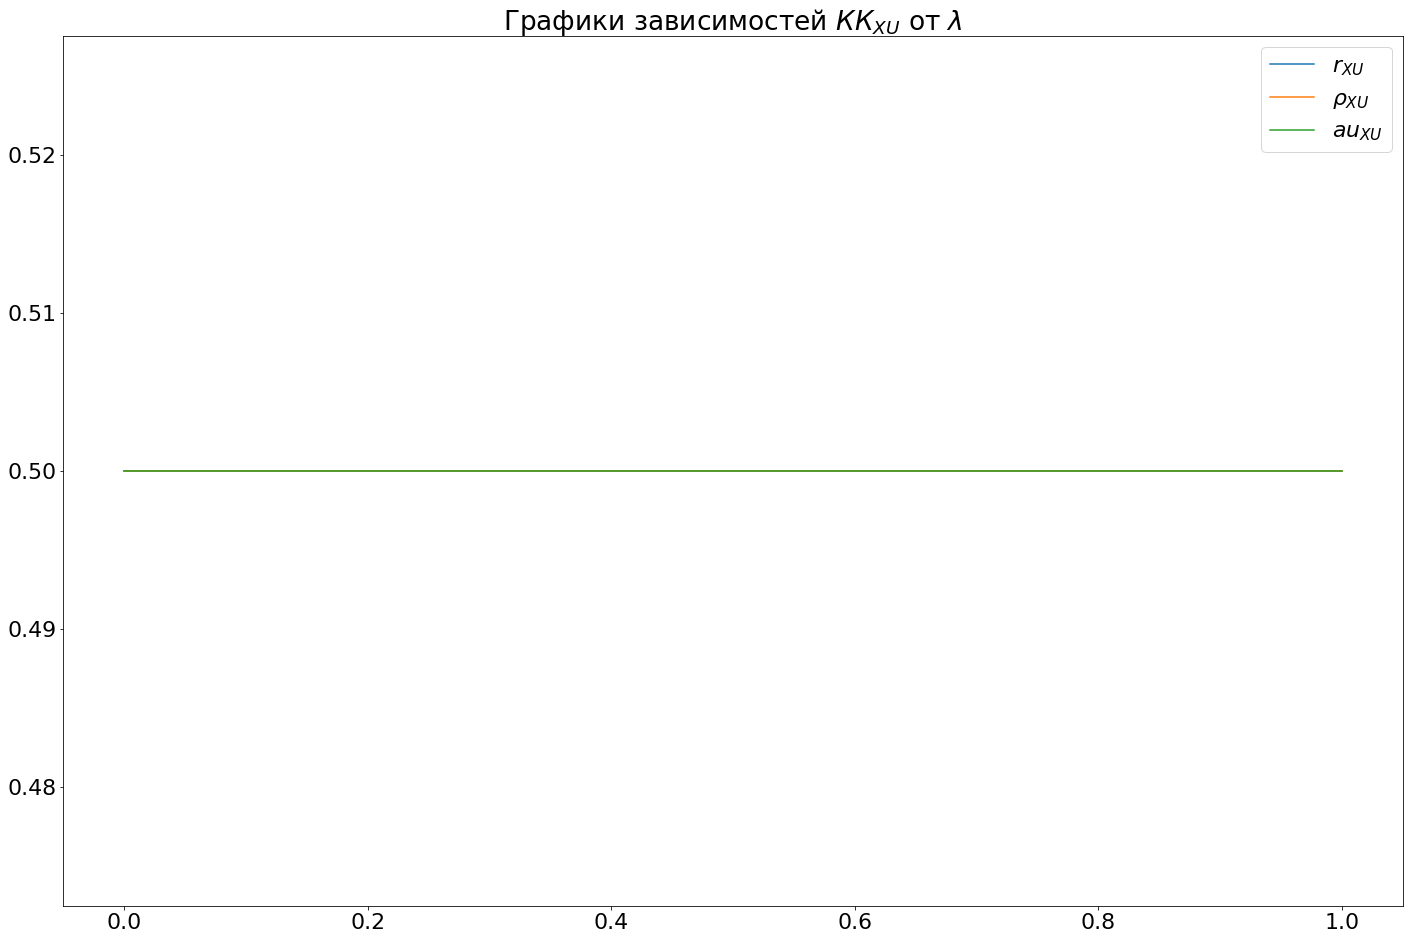

In [23]:
lambda_values = np.linspace(0, 1, 100)

def u(l, x, y):
    return l * x.data() + (1 - l) * y.data()

fig, ax = plt.subplots()
ax.set_title('Графики зависимостей $КК_{XU}$ от $\\lambda$')

pierson_values = [
    pierson(x, u(l, x, y)) for l in lambda_values
]
ax.plot(lambda_values, pierson_values, label='$r_{XU}$')

spirmen_values = [
    spirmen(x, u(l, x, y)) for l in lambda_values
]
ax.plot(lambda_values, spirmen_values, label='$\\rho_{XU}$')

kendell_values = [
    kendell(x, u(l, x, y)) for l in lambda_values
]
ax.plot(lambda_values, kendell_values, label='$\tau_{XU}$')

ax.legend();

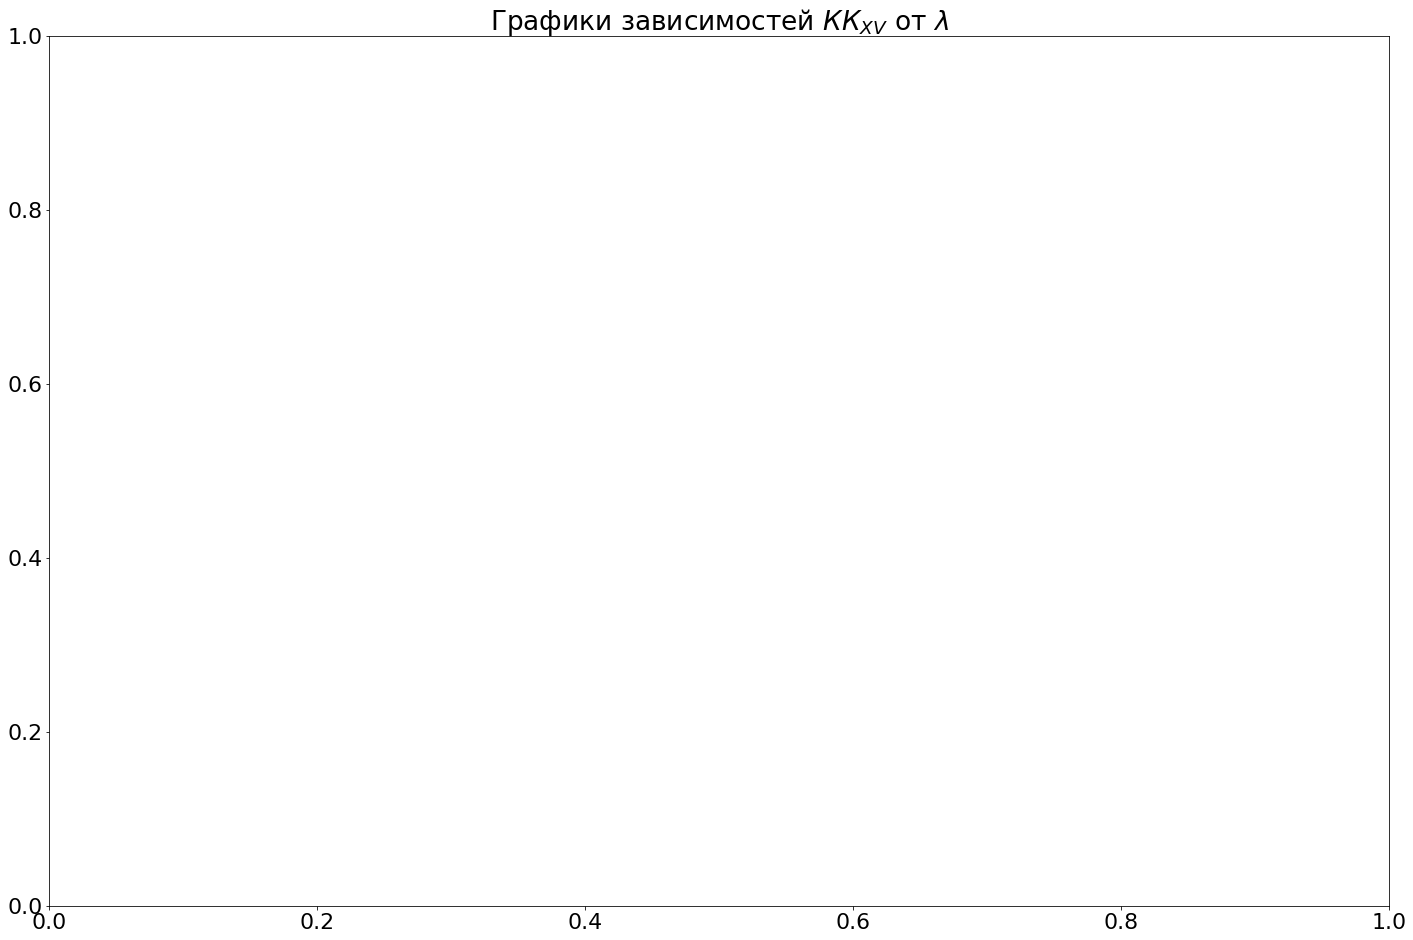

In [24]:
fig, ax = plt.subplots()
ax.set_title('Графики зависимостей $КК_{XV}$ от $\\lambda$');

# аналогично предыдущему пункту

### Выводы:

1. ...
2. ...

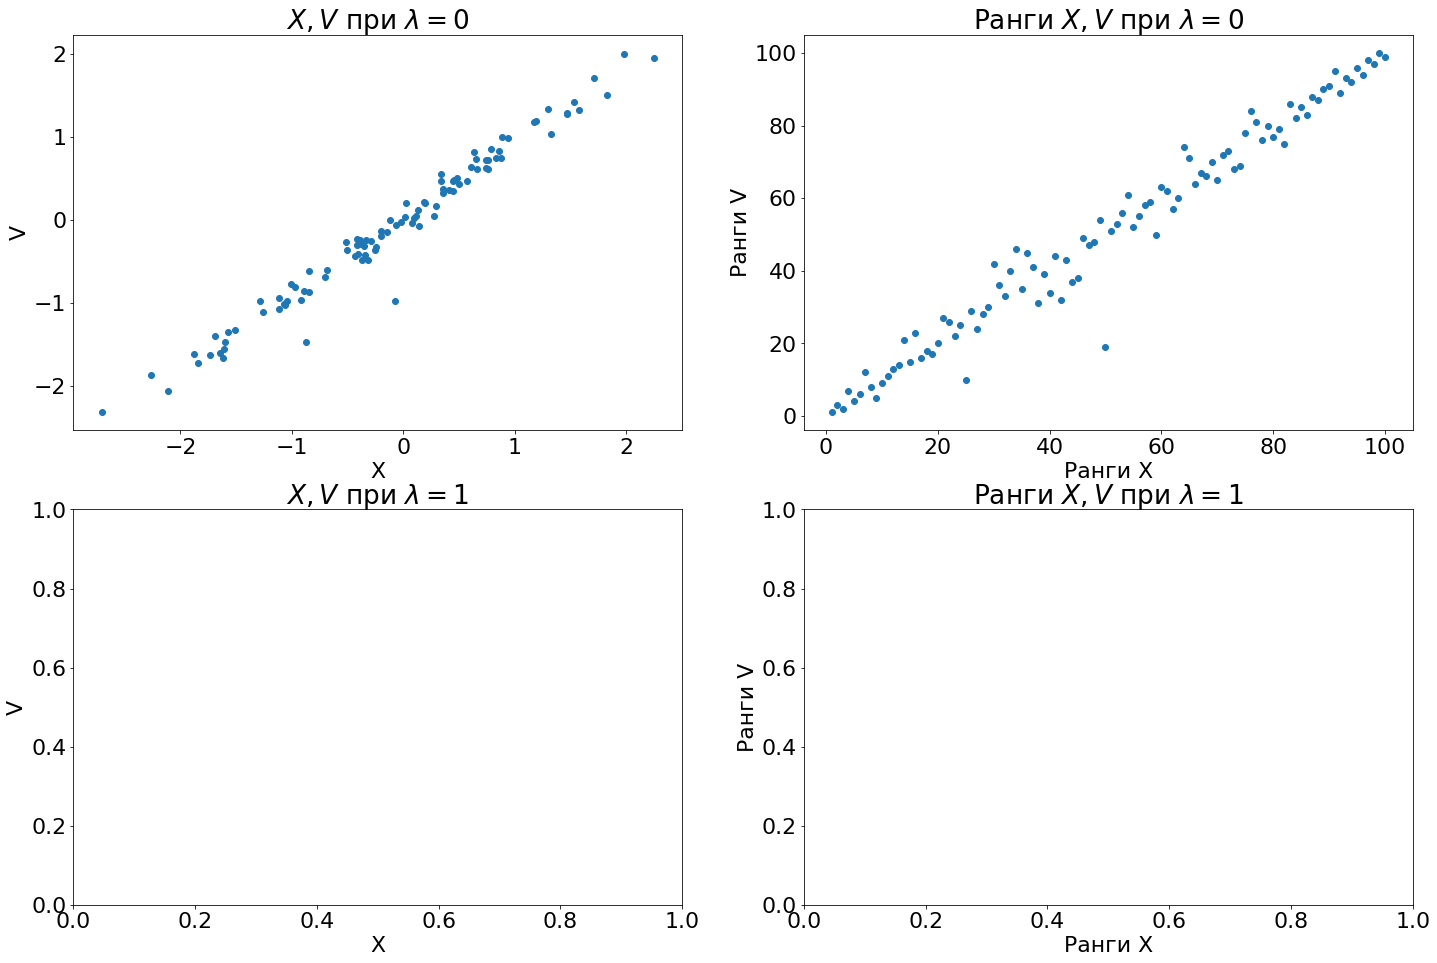

In [26]:
fig, ax = plt.subplots(2, 2)

u0 = Sample.from_data('u0', u(0.9, x, y))

ax[0][0].set_title('$X, V$ при $\\lambda = 0$')
ax[0][0].set_xlabel('X')
ax[0][0].set_ylabel('V')
ax[0][0].scatter(x.data(), u0.data())

ax[0][1].set_title('Ранги $X, V$ при $\\lambda = 0$')
ax[0][1].set_xlabel('Ранги X')
ax[0][1].set_ylabel('Ранги V')
ax[0][1].scatter(x.ranks(), u0.ranks())

ax[1][0].set_title('$X, V$ при $\\lambda = 1$')
ax[1][0].set_xlabel('X')
ax[1][0].set_ylabel('V')

ax[1][1].set_title('Ранги $X, V$ при $\\lambda = 1$')
ax[1][1].set_xlabel('Ранги X')
ax[1][1].set_ylabel('Ранги V');

# TODO

### Выводы:

1. ...
2. ...